In [2]:
import numpy as np
import pandas as pd

In [206]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

# Project 7 Machine Learning

In [11]:
Data=pd.read_csv('data.csv')

#### Examine all variables and their types in the following cell

In [39]:
Data.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [37]:
Data['Bankrupt?'].count()

6819

In [28]:
pd.options.display.min_rows = 100

In [16]:
Data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [23]:
len(Data.columns)

96

# 1. Perform Exploratory Data Analysis (EDA) and data cleaning.

In [34]:
Data['Bankrupt?'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [48]:
print(Data['Bankrupt?'].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [54]:
Data.filter(like='Operating').head()

,Operating Gross Margin,Operating Profit Rate,Operating Expense Rate,Operating Profit Per Share (Yuan ¥),Operating Profit Growth Rate,Operating profit/Paid-in capital,Operating profit per person,Operating Funds to Liability
0,0.601457,0.998969,1.256969e-04,0.095921,0.848195,0.095885,0.392913,0.334015
1,0.610235,0.998946,2.897851e-04,0.093722,0.848088,0.093743,0.391590,0.341106
2,0.601450,0.998857,2.361297e-04,0.092338,0.848094,0.092318,0.381968,0.336731
3,0.583541,0.998700,1.078888e-04,0.077762,0.848005,0.077727,0.378497,0.348716
4,0.598783,0.998973,7.890000e+09,0.096898,0.848258,0.096927,0.394371,0.344639


In [60]:
Data.filter(like='Operating').values

array([[6.01457213e-01, 9.98969203e-01, 1.25696869e-04, ...,
        9.58848340e-02, 3.92912869e-01, 3.34015171e-01],
       [6.10235086e-01, 9.98945978e-01, 2.89785054e-04, ...,
        9.37433843e-02, 3.91589969e-01, 3.41105992e-01],
       [6.01450006e-01, 9.98857353e-01, 2.36129721e-04, ...,
        9.23184653e-02, 3.81967843e-01, 3.36731495e-01],
       ...,
       [6.10444083e-01, 9.98984455e-01, 2.50931192e-04, ...,
        1.00102594e-01, 3.93693042e-01, 3.58847448e-01],
       [6.07849637e-01, 9.99073773e-01, 1.23615412e-04, ...,
        1.11721791e-01, 3.96734583e-01, 3.80250762e-01],
       [6.27408870e-01, 9.98080298e-01, 1.43169543e-03, ...,
        9.24650284e-02, 3.85766943e-01, 2.39584724e-01]])

In [56]:
Data.filter(like='ROA').head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax
0,0.370594,0.424389,0.405750
1,0.464291,0.538214,0.516730
2,0.426071,0.499019,0.472295
3,0.399844,0.451265,0.457733
4,0.465022,0.538432,0.522298


In [59]:
Data.filter(like='ROA').values

array([[0.37059426, 0.42438945, 0.40574977],
       [0.46429094, 0.53821413, 0.51673002],
       [0.42607127, 0.49901875, 0.47229509],
       ...,
       [0.47272461, 0.533744  , 0.52063815],
       [0.50626432, 0.5599106 , 0.55404465],
       [0.49305319, 0.57010467, 0.54954762]])

In [57]:
Data.filter(like='Sales').head()

,Realized Sales Gross Margin,Realized Sales Gross Profit Growth Rate,Cash Flow to Sales,Gross Profit to Sales
0,0.601457,0.022102,0.671568,0.601453
1,0.610235,0.022080,0.671570,0.610237
2,0.601364,0.022760,0.671571,0.601449
3,0.583541,0.022046,0.671519,0.583538
4,0.598783,0.022096,0.671563,0.598782


In [61]:
Data.filter(like='Sales').values

array([[0.60145721, 0.02210228, 0.67156765, 0.60145329],
       [0.61023509, 0.02208017, 0.67156994, 0.61023653],
       [0.60136352, 0.0227601 , 0.67157132, 0.60144934],
       ...,
       [0.61021347, 0.02206835, 0.67156372, 0.61044059],
       [0.60784964, 0.02234993, 0.67160595, 0.60784592],
       [0.62740887, 0.02531588, 0.67209645, 0.62740824]])

In [58]:
Data.filter(like='Net').head()

,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Per Share Net profit before tax (Yuan ¥),After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Net Value Growth Rate,Net worth/Assets,Contingent liabilities/Net worth,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Net Worth Turnover Rate (times),Net Income to Total Assets,Net Income to Stockholder's Equity,Net Income Flag
0,0.147950,0.147950,0.147950,0.138736,0.688979,0.688979,0.217535,0.000327,0.792424,0.006479,0.137757,0.398036,0.032903,0.716845,0.827890,1
1,0.182251,0.182251,0.182251,0.169918,0.689693,0.689702,0.217620,0.000443,0.828824,0.005835,0.168962,0.397725,0.025484,0.795297,0.839969,1
2,0.177911,0.177911,0.193713,0.142803,0.689463,0.689470,0.217601,0.000396,0.792484,0.006562,0.148036,0.406580,0.013387,0.774670,0.836774,1
3,0.154187,0.154187,0.154187,0.148603,0.689110,0.689110,0.217568,0.000382,0.848535,0.005366,0.147561,0.397925,0.028065,0.739555,0.834697,1
4,0.167502,0.167502,0.167502,0.168412,0.689697,0.689697,0.217626,0.000439,0.893491,0.006624,0.167461,0.400079,0.040161,0.795016,0.839973,1


In [62]:
Data.filter(like='Net').values

array([[0.14794994, 0.14794994, 0.14794994, ..., 0.71684534, 0.82789021,
        1.        ],
       [0.18225106, 0.18225106, 0.18225106, ..., 0.79529714, 0.83996927,
        1.        ],
       [0.17791075, 0.17791075, 0.19371287, ..., 0.7746697 , 0.83677431,
        1.        ],
       ...,
       [0.26952088, 0.26952088, 0.26952088, ..., 0.79777807, 0.84013826,
        1.        ],
       [0.21339177, 0.21339177, 0.21339177, ..., 0.8118079 , 0.84108361,
        1.        ],
       [0.22076609, 0.22076609, 0.22076609, ..., 0.81595588, 0.84101855,
        1.        ]])

In [63]:
Data.filter(like='interest').head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Continuous interest rate (after tax),Interest-bearing debt interest rate
0,0.370594,0.424389,0.405750,0.780985,0.000725
1,0.464291,0.538214,0.516730,0.781506,0.000647
2,0.426071,0.499019,0.472295,0.780284,0.000790
3,0.399844,0.451265,0.457733,0.781241,0.000449
4,0.465022,0.538432,0.522298,0.781550,0.000686


In [64]:
Data.filter(like='interest').values

array([[3.70594257e-01, 4.24389446e-01, 4.05749772e-01, 7.80984850e-01,
        7.25072507e-04],
       [4.64290937e-01, 5.38214130e-01, 5.16730018e-01, 7.81505974e-01,
        6.47064706e-04],
       [4.26071272e-01, 4.99018753e-01, 4.72295091e-01, 7.80283936e-01,
        7.90079008e-04],
       ...,
       [4.72724614e-01, 5.33744003e-01, 5.20638150e-01, 7.81546395e-01,
        0.00000000e+00],
       [5.06264320e-01, 5.59910597e-01, 5.54044649e-01, 7.81663308e-01,
        2.11021102e-04],
       [4.93053186e-01, 5.70104666e-01, 5.49547620e-01, 7.86079039e-01,
        5.90000000e+08]])

In [65]:
Data.filter(like='Operating Profit Rate')

,Operating Profit Rate
0,0.998969
1,0.998946
2,0.998857
3,0.998700
4,0.998973
5,0.998758
6,0.998993
7,0.999009
8,0.998961
9,0.999001


In [70]:
Data.filter(like='Operating Profit Rate').values

array([[0.9989692 ],
       [0.99894598],
       [0.99885735],
       ...,
       [0.99898446],
       [0.99907377],
       [0.9980803 ]])

In [72]:
Data.filter(like='Equity to Liability').sort_values
#E/L ratio varies from 1% to 23%

<bound method DataFrame.sort_values of        Equity to Liability
0                 0.016469
1                 0.020794
2                 0.016474
3                 0.023982
4                 0.035490
5                 0.019534
6                 0.015663
7                 0.034889
8                 0.065826
9                 0.030801
10                0.036572
11                0.040381
12                0.025282
13                0.035464
14                0.042646
15                0.038354
16                0.062940
17                0.048822
18                0.025953
19                0.049622
20                0.039507
21                0.037680
22                0.024915
23                0.018005
24                0.017839
25                0.024869
26                0.041465
27                0.104842
28                0.042682
29                0.015349
...                    ...
6789              0.035334
6790              0.017872
6791              0.028561
6792            

In [30]:
Data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

In [29]:
Data.isna().sum().sort_values(ascending=False)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
 Long-term Liability to Current Assets                      0
 Current Liabilities/Equity                                 0
 Working Capital/Equity                                     0
 Current Liabilities/Liability                              0
 Inventory/Current Liability                                0
 Inventory/Working Capital                                  0
 Operating Funds to Liability                               0
 Current Liability to Assets                                0
 Cash/Current Liability                                     0
 Quick Assets/Current Liability                             0
 Cash/Total Assets                                          0
 Current

# 2. Please conduct EDA and descriptive analytics

In [73]:
Data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [74]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
Data.describe

<bound method NDFrame.describe of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after

In [86]:
Data.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [89]:
Data[' Net Income to Total Assets']

0       0.716845
1       0.795297
2       0.774670
3       0.739555
4       0.795016
5       0.710420
6       0.736619
7       0.815350
8       0.803647
9       0.804195
10      0.814111
11      0.804887
12      0.803260
13      0.794158
14      0.819715
15      0.815419
16      0.810421
17      0.826642
18      0.806264
19      0.802552
20      0.804639
21      0.814012
22      0.808976
23      0.798104
24      0.803445
25      0.772909
26      0.812974
27      0.830176
28      0.812100
29      0.750431
          ...   
6789    0.665514
6790    0.791776
6791    0.811596
6792    0.809055
6793    0.842449
6794    0.839268
6795    0.868035
6796    0.818199
6797    0.784300
6798    0.862123
6799    0.824850
6800    0.772423
6801    0.836314
6802    0.837615
6803    0.801261
6804    0.804195
6805    0.817712
6806    0.812230
6807    0.814083
6808    0.805521
6809    0.776535
6810    0.846995
6811    0.815844
6812    0.806743
6813    0.794028
6814    0.799927
6815    0.799748
6816    0.7977

In [90]:
Data[' Operating Gross Margin']

0       0.601457
1       0.610235
2       0.601450
3       0.583541
4       0.598783
5       0.590171
6       0.619950
7       0.601738
8       0.603612
9       0.599209
10      0.614026
11      0.623712
12      0.608131
13      0.600578
14      0.604686
15      0.621773
16      0.606524
17      0.618451
18      0.598344
19      0.636259
20      0.622177
21      0.607446
22      0.618934
23      0.609507
24      0.602956
25      0.611763
26      0.626544
27      0.609738
28      0.602027
29      0.599115
          ...   
6789    0.605226
6790    0.599281
6791    0.600823
6792    0.596766
6793    0.622660
6794    0.609659
6795    0.607460
6796    0.604563
6797    0.613723
6798    0.625038
6799    0.606343
6800    0.619762
6801    0.620346
6802    0.609032
6803    0.601428
6804    0.600744
6805    0.603583
6806    0.610358
6807    0.603864
6808    0.606805
6809    0.606012
6810    0.602841
6811    0.612736
6812    0.613219
6813    0.595829
6814    0.604455
6815    0.598308
6816    0.6104

In [115]:
#X = Data.drop(' Realized Sales Gross Margin',axis = 1)
#y = Data[' Realized Sales Gross Margin']
#X = [Data[' Net Income to Total Assets'], Data[' Equity to Liability'], Data[' Gross Profit to Sales']]
#y = Data[' Realized Sales Gross Margin']

In [110]:
Data[' Realized Sales Gross Margin']

0       0.601457
1       0.610235
2       0.601364
3       0.583541
4       0.598783
5       0.590251
6       0.619950
7       0.601717
8       0.603612
9       0.599209
10      0.614026
11      0.623712
12      0.608138
13      0.600578
14      0.604686
15      0.621773
16      0.606524
17      0.618451
18      0.598344
19      0.636252
20      0.622256
21      0.607446
22      0.618934
23      0.609507
24      0.602956
25      0.611806
26      0.626544
27      0.609738
28      0.602293
29      0.599115
          ...   
6789    0.605010
6790    0.599353
6791    0.600823
6792    0.596766
6793    0.622018
6794    0.609781
6795    0.607460
6796    0.604563
6797    0.613723
6798    0.625038
6799    0.606379
6800    0.619784
6801    0.620346
6802    0.609024
6803    0.601428
6804    0.600744
6805    0.603590
6806    0.610358
6807    0.603864
6808    0.606805
6809    0.606012
6810    0.602841
6811    0.612527
6812    0.613168
6813    0.595858
6814    0.604462
6815    0.598308
6816    0.6102

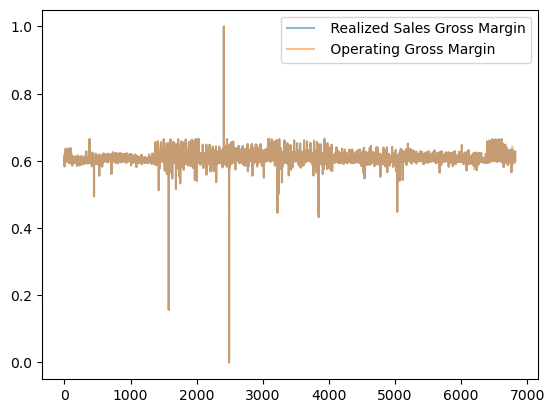

In [261]:
Data[[' Realized Sales Gross Margin', ' Operating Gross Margin']].plot(alpha=0.5); 

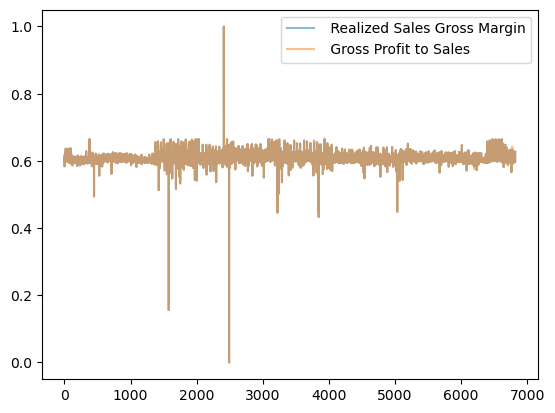

In [260]:
Data[[' Realized Sales Gross Margin', ' Gross Profit to Sales']].plot(alpha=0.5);

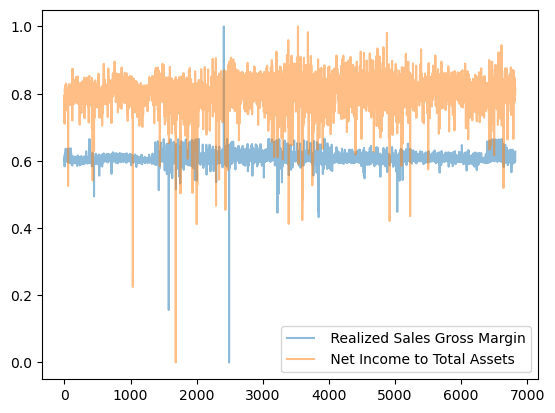

In [262]:
Data[[' Realized Sales Gross Margin', ' Net Income to Total Assets']].plot(alpha=0.5);  

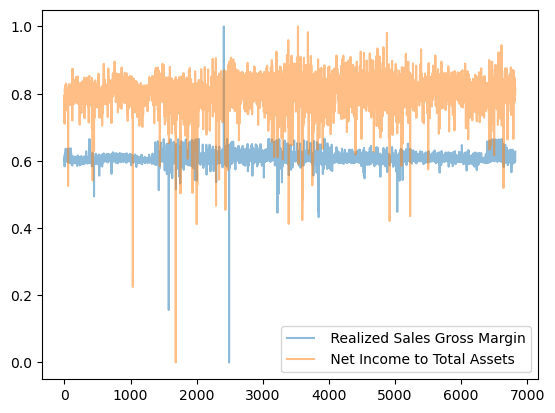

In [264]:
Data[[' Realized Sales Gross Margin', ' Net Income to Total Assets']].plot(alpha=0.5); 

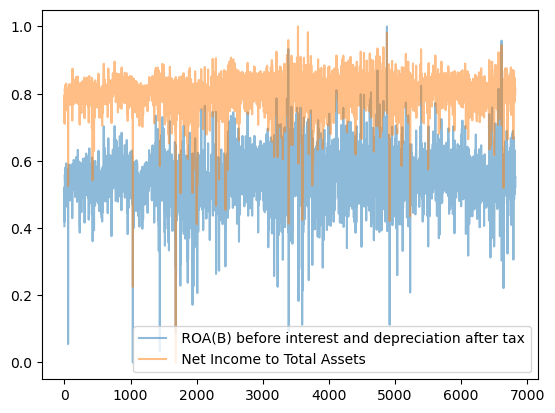

In [263]:
Data[[' ROA(B) before interest and depreciation after tax', ' Net Income to Total Assets']].plot(alpha=0.5);  

In [ ]:
# Data[' Gross Profit to Sales']
# Data[' Net Income to Total Assets

In [321]:
X = Data[" ROA(B) before interest and depreciation after tax"]
y = Data[' Net Income to Total Assets']

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=64)

# 1. Choose a class of model (KNeighborsRegressor)

In [310]:
y_test.shape

(1364,)

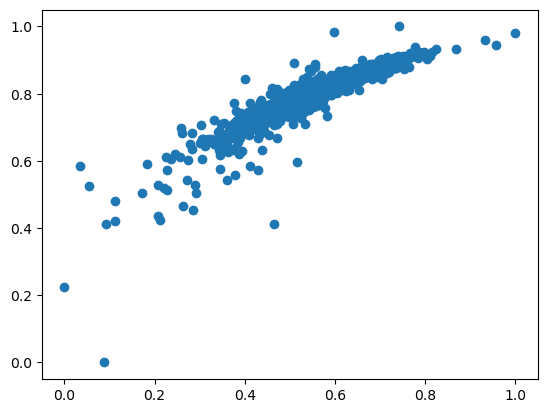

In [311]:
plt.scatter(X, y)

In [336]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [338]:
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [341]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [342]:
y_pred = knn.predict(X_test)

In [344]:
r2 = r2_score(y_test, y_pred)
print("r2:", r2)

r2: -0.23743077504593213


In [189]:
# separate majority/minority classes
no_bankruptcy = Data[Data['Bankrupt?']==0]
yes_bankruptcy = Data[Data['Bankrupt?']==1]

In [190]:
display(no_bankruptcy.shape)
display(yes_bankruptcy.shape)

(6599, 96)

(220, 96)

In [191]:
yes_bankruptcy.shape

(220, 96)